In [1]:
import numpy as np
import numpy.random as npr
import cvxpy as cp
import time
import matplotlib.pyplot as plt

from formulations import *

## Expected Optimal Value

In [58]:
m = 20
n = 15
trials = 100
Data_mat = np.zeros((trials))
w = np.ones(n)
r = 8
for trial in range(trials):
    print(trial / trials)
    K_mat = rand_01_mat(m,n)
    Data_mat[trial], _, _ = misp(K_mat,w,r)



0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99


In [59]:
Data_mat

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.])

(array([99.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

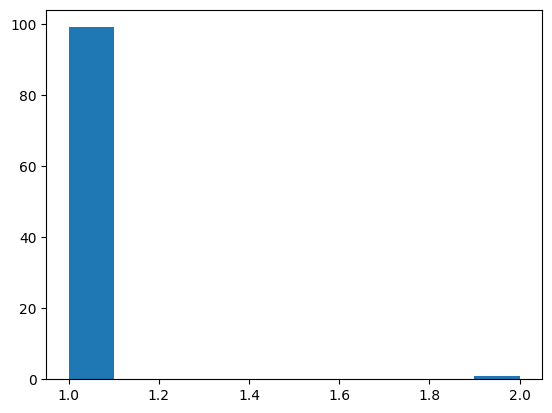

In [60]:
plt.hist(Data_mat)

## Small Experiment (m = 30,n = 8), trials = 10

In [61]:
m = 40
n = 15
trials = 1
Data_mat = np.zeros((trials, m + 1))
Data_mat_lp = np.zeros((trials, m + 1))
Data_mat_sdp = np.zeros((trials, m + 1))

Data_col = np.zeros((trials, m + 1))
Data_col_lp = np.zeros((trials, m + 1))
Data_col_sdp = np.zeros((trials, m + 1))


w = np.ones(n)

K_mat = rand_01_mat(m,n)
K_col = rand_01_col_mat(m,n)
for r in range(m + 1):
    print(r/m)
    for trial in range(trials):


        Data_mat[trial,r], _, _ = misp(K_mat,w,r)
        Data_mat_lp[trial,r], _, _ = misp_lp(K_mat,w,r)
        # Data_mat_sdp[trial,r], _  = misp_sdp(K_mat,w,r)

        Data_col[trial,r], _, _ = misp(K_col,w,r)
        Data_col_lp[trial,r], _, _ = misp_lp(K_col,w,r)
        # Data_col_sdp[trial,r], _ = misp_sdp(K_col,w,r)



0.0
0.025
0.05
0.075
0.1
0.125
0.15
0.175
0.2
0.225
0.25
0.275
0.3
0.325
0.35
0.375
0.4
0.425
0.45
0.475
0.5
0.525
0.55
0.575
0.6
0.625
0.65
0.675
0.7
0.725
0.75
0.775
0.8
0.825
0.85
0.875
0.9
0.925
0.95
0.975
1.0


## Compare Values for normal matrix

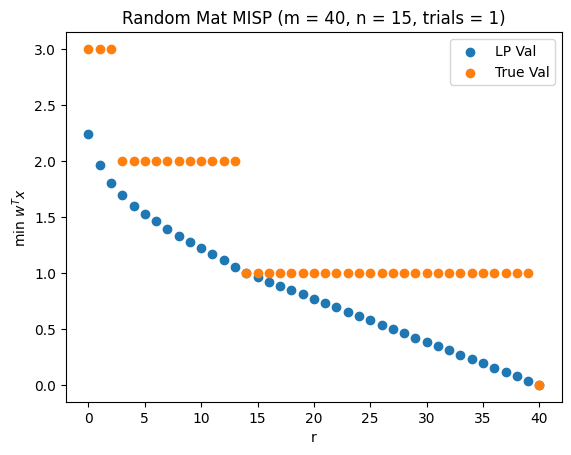

In [63]:
plt.scatter(range(m+1),np.mean(Data_mat_lp, axis=0),label="LP Val")
# plt.scatter(range(m+1),np.mean(Data_mat_sdp, axis=0),label="SDP Val")
plt.scatter(range(m+1),np.mean(Data_mat, axis=0),label="True Val")
plt.xlabel("r")
plt.ylabel("min $w^T x$")
# plt.xticks(range(m + 1))
plt.title("Random Mat MISP (m = {}, n = {}, trials = {})".format(m,n,trials))
plt.legend()

/var/folders/19/8vdtx5nd3sq7rqsqkrvs3vj80000gn/T/ipykernel_5596/2340503426.py:1: RuntimeWarning: divide by zero encountered in divide
  Data_normed_lp = (np.mean(Data_mat, axis=0) - np.mean(Data_mat_lp, axis=0))/np.mean(Data_mat, axis=0)


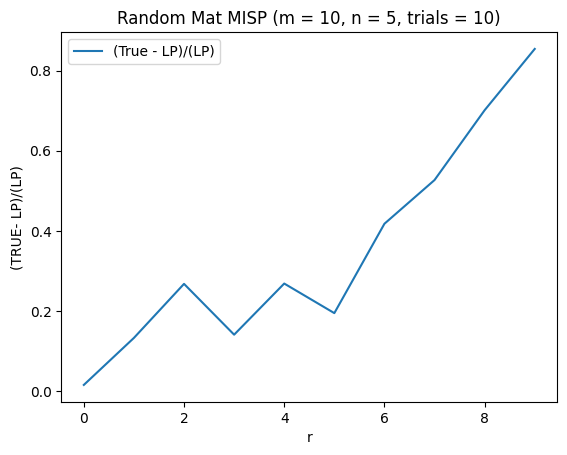

In [15]:
Data_normed_lp = (np.mean(Data_mat, axis=0) - np.mean(Data_mat_lp, axis=0))/np.mean(Data_mat, axis=0)

plt.plot(Data_normed_lp,label="(True - LP)/(LP)")
plt.xlabel("r")
plt.ylabel("(TRUE- LP)/(LP)")
plt.title("Random Mat MISP (m = {}, n = {}, trials = {})".format(m,n,trials))
plt.legend()

/var/folders/19/8vdtx5nd3sq7rqsqkrvs3vj80000gn/T/ipykernel_5596/3325182235.py:1: RuntimeWarning: divide by zero encountered in divide
  Data_normed_lp = (np.mean(Data_mat, axis=0) - np.mean(Data_mat_sdp, axis=0))/np.mean(Data_mat, axis=0)


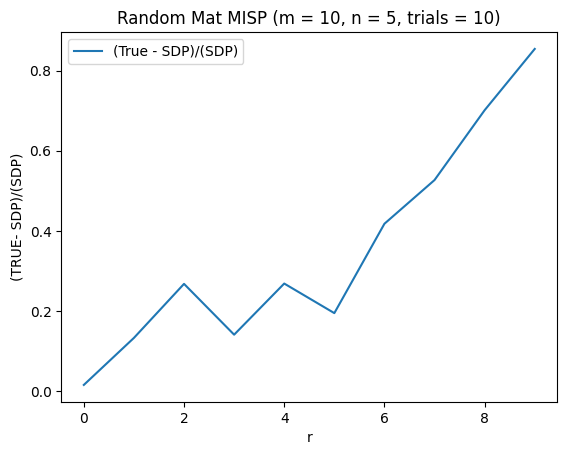

In [16]:
Data_normed_lp = (np.mean(Data_mat, axis=0) - np.mean(Data_mat_sdp, axis=0))/np.mean(Data_mat, axis=0)

plt.plot(Data_normed_lp,label="(True - SDP)/(SDP)")
plt.xlabel("r")
plt.ylabel("(TRUE- SDP)/(SDP)")
plt.title("Random Mat MISP (m = {}, n = {}, trials = {})".format(m,n,trials))
plt.legend()

## Plot for random col matrix

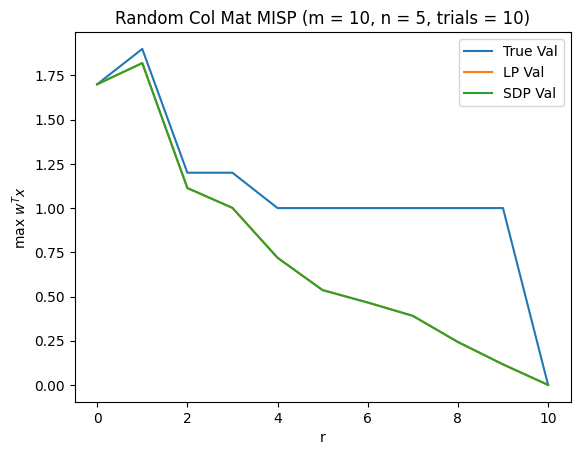

In [17]:
plt.plot(np.mean(Data_col, axis=0),label="True Val")
plt.plot(np.mean(Data_col_lp, axis=0),label="LP Val")
plt.plot(np.mean(Data_col_sdp, axis=0),label="SDP Val")
plt.xlabel("r")
plt.ylabel("max $w^T x$")
plt.title("Random Col Mat MISP (m = {}, n = {}, trials = {})".format(m,n,trials))
plt.legend()

/var/folders/19/8vdtx5nd3sq7rqsqkrvs3vj80000gn/T/ipykernel_5596/3873933838.py:1: RuntimeWarning: divide by zero encountered in divide
  Data_normed_lp_col = (np.mean(Data_col, axis=0) - np.mean(Data_col_lp, axis=0))/np.mean(Data_col, axis=0)


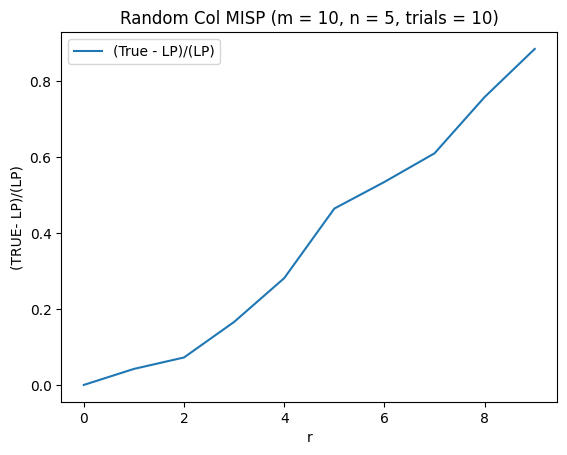

In [18]:
Data_normed_lp_col = (np.mean(Data_col, axis=0) - np.mean(Data_col_lp, axis=0))/np.mean(Data_col, axis=0)

plt.plot(Data_normed_lp_col,label="(True - LP)/(LP)")
plt.xlabel("r")
plt.ylabel("(TRUE- LP)/(LP)")
plt.title("Random Col MISP (m = {}, n = {}, trials = {})".format(m,n,trials))
plt.legend()

/var/folders/19/8vdtx5nd3sq7rqsqkrvs3vj80000gn/T/ipykernel_5596/1716194630.py:1: RuntimeWarning: divide by zero encountered in divide
  Data_normed_sdp_col = (np.mean(Data_col, axis=0) - np.mean(Data_col_sdp, axis=0))/np.mean(Data_col, axis=0)


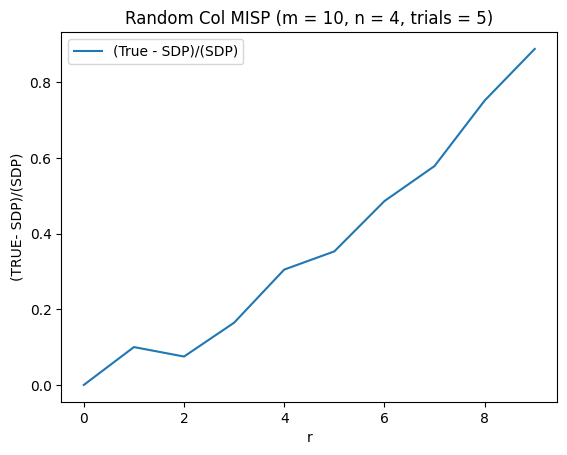

In [8]:
Data_normed_sdp_col = (np.mean(Data_col, axis=0) - np.mean(Data_col_sdp, axis=0))/np.mean(Data_col, axis=0)

plt.plot(Data_normed_lp_col,label="(True - SDP)/(SDP)")
plt.xlabel("r")
plt.ylabel("(TRUE- SDP)/(SDP)")
plt.title("Random Col MISP (m = {}, n = {}, trials = {})".format(m,n,trials))
plt.legend()

## Adding in Extra constraints